In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, precision_score, recall_score, roc_curve, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [37]:
from scipy.stats import norm, skew

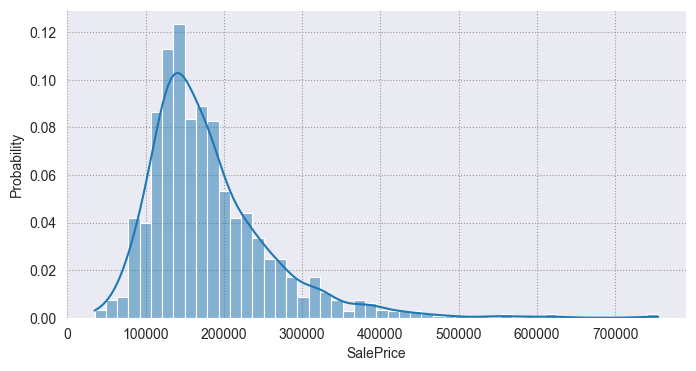

In [63]:
plt.figure(figsize = (8, 4))
sns.histplot(train_data["SalePrice"], bins = 50, kde = True, stat = "probability", edgecolor = None)
plt.show()

In [3]:
df_all = pd.concat([train_data, test_data]).reset_index().drop(columns = ["index", "Id"])

In [25]:
df_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [109]:
na_values = df_all.isnull().sum()
na_values.sort_values(ascending = False).head(20)

MasVnrType      1766
SalePrice       1459
LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
Electrical         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
Fireplaces         0
GarageType         0
FireplaceQu        0
KitchenAbvGr       0
Functional         0
TotRmsAbvGrd       0
dtype: int64

In [4]:
df_all["MSZoning"] = df_all["MSZoning"].fillna(df_all["MSZoning"].mode()[0])

In [5]:
df_all["Functional"] = df_all["Functional"].fillna(df_all["Functional"].mode()[0])

In [6]:
df_all["Exterior1st"] = df_all["Exterior1st"].fillna(df_all["Exterior1st"].mode()[0])

In [7]:
df_all["Exterior2nd"] = df_all["Exterior2nd"].fillna(df_all["Exterior2nd"].mode()[0])

In [8]:
df_all["SaleType"] = df_all["SaleType"].fillna(df_all["SaleType"].mode()[0])

In [9]:
df_all["Utilities"] = df_all["Utilities"].fillna(df_all["Utilities"].mode()[0])

In [10]:
df_all["BsmtFinType1"] = df_all["BsmtFinType1"].fillna("None")

In [11]:
df_all["BsmtFinType2"] = df_all["BsmtFinType2"].fillna("None")

In [12]:
df_all["BsmtQual"] = df_all["BsmtQual"].fillna("None")

In [13]:
df_all["BsmtExposure"] = df_all["BsmtExposure"].fillna("None")

In [14]:
df_all["BsmtCond"] = df_all["BsmtCond"].fillna("None")

In [83]:
df_all["GarageType"] = df_all["GarageType"].fillna("None")

In [16]:
df_all["GarageCond"] = df_all["GarageCond"].fillna("None")

In [17]:
df_all["GarageFinish"] = df_all["GarageFinish"].fillna("None")

In [18]:
df_all["GarageYrBlt"] = df_all["GarageYrBlt"].fillna("None")

In [19]:
df_all["GarageQual"] = df_all["GarageQual"].fillna("None")

In [20]:
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")

In [21]:
df_all["Fence"] = df_all["Fence"].fillna("None")

In [22]:
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")

In [23]:
df_all["Alley"] = df_all["Alley"].fillna("None")

In [24]:
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")

In [25]:
df_all.to_csv("./datasets/provisional_data.csv", index = False)

In [26]:
df_all = pd.read_csv("./datasets/provisional_data.csv")
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [84]:
df_all.isnull().sum().sort_values(ascending = False).head(20)

MiscFeature     2814
MSSubClass         0
BedroomAbvGr       0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
HalfBath           0
GarageFinish       0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
GarageYrBlt        0
dtype: int64

In [28]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_all[col] = df_all[col].fillna(0)


In [29]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_all[col] = df_all[col].fillna(0)

In [30]:
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

In [31]:
df_all["MasVnrType"] = df_all["MasVnrArea"].fillna("None")

In [32]:
df_all["Electrical"] = df_all["Electrical"].fillna(df_all["Electrical"].mode()[0])

In [33]:
df_all["KitchenQual"] = df_all["KitchenQual"].fillna(df_all["KitchenQual"].mode()[0])

In [34]:
df_all["LotFrontage"] = df_all.groupby(by = "Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [35]:
df_all = df_all.drop(columns = ["Utilities"])

In [36]:
df_all["MSSubClass"] = df_all["MSSubClass"].apply(str)

In [37]:
df_all["OverallQual"] = df_all["OverallQual"].astype(str)
df_all["OverallCond"] = df_all["OverallCond"].astype(str)

In [38]:
df_all['YrSold'] = df_all['YrSold'].astype(str)
df_all['MoSold'] = df_all['MoSold'].astype(str)

In [39]:
df_all.dtypes[df_all.dtypes == "object"]

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature     

In [ ]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', "MSZoning", "LandContour")

In [41]:
for c in cols:
    label_encoder = LabelEncoder()
    df_all[c] = label_encoder.fit_transform(df_all[c])


In [219]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,10,3,65.0,8450,1,2,3,3,Inside,0,...,0,3,4,NaN,0,4,2,WD,Normal,208500.0
1,5,3,80.0,9600,1,2,3,3,FR2,0,...,0,3,4,NaN,0,7,1,WD,Normal,181500.0
2,10,3,68.0,11250,1,2,0,3,Inside,0,...,0,3,4,NaN,0,11,2,WD,Normal,223500.0
3,11,3,60.0,9550,1,2,0,3,Corner,0,...,0,3,4,NaN,0,4,0,WD,Abnorml,140000.0
4,10,3,84.0,14260,1,2,0,3,FR2,0,...,0,3,4,NaN,0,3,2,WD,Normal,250000.0


In [220]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int32  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   Alley          2919 non-null   int32  
 6   LotShape       2919 non-null   int32  
 7   LandContour    2919 non-null   int32  
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   object 
 16  OverallCond    2919 non-null   int32  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [221]:
df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [42]:
y = df_all.iloc[:1460]["SalePrice"]
df_all = df_all.drop(columns = "SalePrice")

In [223]:
from scipy.stats import skew

In [224]:
numeric_feats = df_all.dtypes[df_all.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [225]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_all[feat] = boxcox1p(df_all[feat], lam)

There are 61 skewed numerical features to Box Cox transform


In [43]:
dummies = pd.get_dummies(df_all)

In [44]:
X_train = dummies.iloc[:1460]
X_pred = dummies.iloc[1460:]

In [47]:
lasso_model = Lasso(alpha = 155)
np.sqrt(-cross_val_score(lasso_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean())

31606.04436191217

In [48]:
ridge_model = Ridge(alpha = 10)
np.sqrt(-cross_val_score(ridge_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean())

32245.26895527206

In [ ]:
rf_model = RandomForestRegressor()
cross_val_score(rf_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean()

0.8617243646319526

In [ ]:
knn_model = KNeighborsRegressor()
cross_val_score(knn_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean()

0.6638359420059152

In [ ]:
xgb_model = XGBRegressor()
cross_val_score(xgb_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean()

0.8430951166420961

In [ ]:
lgbm_model = LGBMRegressor()
cross_val_score(lgbm_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3444
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 156
[LightGBM] [Info] Start training from score 181632.805175
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3424
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 156
[LightGBM] [Info] Start training from score 180028.160578
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

0.8668435433666062

In [46]:
gradient_model = GradientBoostingRegressor()
cross_val_score(gradient_model, X_train, y, cv = 10, scoring="neg_mean_squared_error").mean()

-819747728.032976

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

In [53]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [54]:
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha = 1))
rmsle_cv(lasso_model).mean()

e:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+11, tolerance: 6.990e+08
  model = cd_fast.enet_

33027.39186606678

In [55]:
gradient_model = make_pipeline(RobustScaler(), GradientBoostingRegressor())
rmsle_cv(gradient_model).mean()

28100.144428698095

In [56]:
xgb_model = make_pipeline(RobustScaler(), XGBRegressor())
rmsle_cv(xgb_model).mean()

30656.14276376114

In [57]:
rf_model = make_pipeline(RobustScaler(), RandomForestRegressor(max_depth = 10))
rmsle_cv(rf_model).mean()

29809.691817702456

In [58]:
lgbm_model = make_pipeline(RobustScaler(), LGBMRegressor())
rmsle_cv(lgbm_model).mean()

e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3286
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 137
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3301
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 134
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the

29256.013208013883

In [59]:
ridge_model = make_pipeline(RobustScaler(), Ridge())
rmsle_cv(ridge_model).mean()

31394.268675843392

In [60]:
X = X_train.copy()

In [234]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
lgbm_model = make_pipeline(RobustScaler(), LGBMRegressor())
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3237
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 135
[LightGBM] [Info] Start training from score 180256.486758


In [62]:
from sklearn.metrics import root_mean_squared_error

In [66]:
root_mean_squared_error(y_test, lgbm_pred)

29727.368159339767

In [76]:
lgbm_prediction = lgbm_model.predict(X_pred)

In [63]:
gradient_model.fit(X_train, y_train)
gradient_pred = gradient_model.predict(X_test)
root_mean_squared_error(y_test, gradient_pred)

29545.379601210778

In [67]:
prediction = gradient_model.predict(X_pred)
prediction

array([121326.052278  , 153611.72242678, 186003.26700731, ...,
       145849.64326911, 133777.82787249, 237205.62288501])

In [68]:
df_pred = pd.DataFrame(index = range(1461, 2920))

In [78]:
df_pred["Id"] = df_pred.index
df_pred["SalePrice"] = lgbm_prediction

In [70]:
df_pred.head()

,Id,SalePrice
1461,1461,121326.052278
1462,1462,153611.722427
1463,1463,186003.267007
1464,1464,181174.178369
1465,1465,184190.356701


In [79]:
df_pred.to_csv("./results/lgbm_no_optimization.csv", index = False)

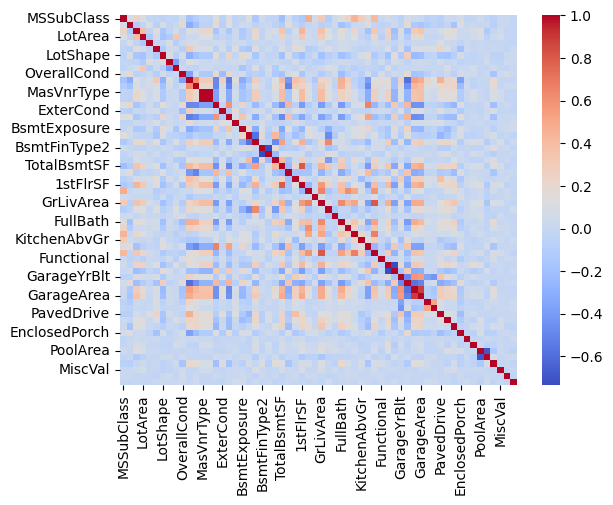

In [75]:
sns.heatmap(df_all.corr(numeric_only = True), cmap = "coolwarm");

In [87]:
df_all.isnull().sum().sort_values(ascending = False)

MiscFeature      2814
MSSubClass          0
BedroomAbvGr        0
GarageType          0
FireplaceQu         0
                 ... 
ExterQual           0
MasVnrArea          0
MasVnrType          0
Exterior2nd         0
SaleCondition       0
Length: 78, dtype: int64

In [85]:
df_all["GarageType"] = LabelEncoder().fit_transform(df_all["GarageType"])

In [86]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,2,3,3,Inside,0,...,0,0,3,4,NaN,0,4,2,WD,Normal
1,5,3,80.0,9600,1,2,3,3,FR2,0,...,0,0,3,4,NaN,0,7,1,WD,Normal
2,10,3,68.0,11250,1,2,0,3,Inside,0,...,0,0,3,4,NaN,0,11,2,WD,Normal
3,11,3,60.0,9550,1,2,0,3,Corner,0,...,0,0,3,4,NaN,0,4,0,WD,Abnorml
4,10,3,84.0,14260,1,2,0,3,FR2,0,...,0,0,3,4,NaN,0,3,2,WD,Normal


In [88]:
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")

In [89]:
dummies = pd.get_dummies(df_all)

In [90]:
dummies.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LandSlope,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,3,65.0,8450,1,2,3,3,0,4,...,False,False,False,True,False,False,False,False,True,False
1,5,3,80.0,9600,1,2,3,3,0,7,...,False,False,False,True,False,False,False,False,True,False
2,10,3,68.0,11250,1,2,0,3,0,4,...,False,False,False,True,False,False,False,False,True,False
3,11,3,60.0,9550,1,2,0,3,0,4,...,False,False,False,True,True,False,False,False,False,False
4,10,3,84.0,14260,1,2,0,3,0,4,...,False,False,False,True,False,False,False,False,True,False


In [92]:
X_train = dummies.iloc[:1460]
X_pred = dummies.iloc[1460:]

In [93]:
gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train, y)

GradientBoostingRegressor()

In [94]:
gradient_prediction = gradient_model.predict(X_pred)

In [96]:
df_pred = pd.DataFrame(index = range(1461, 2920))

In [97]:
df_pred["Id"] = df_pred.index
df_pred["SalePrice"] = gradient_prediction

In [98]:
df_pred.head()

,Id,SalePrice
1461,1461,122249.848694
1462,1462,162991.341856
1463,1463,184472.351663
1464,1464,176773.290104
1465,1465,184215.503112


In [104]:
gradient_model = GradientBoostingRegressor()
rmsle_cv(gradient_model).mean()

27140.334909210877

In [14]:
def rmse(real, pred):
    return np.sqrt(mean_squared_error(real, pred))

In [15]:
from sklearn.metrics import make_scorer

In [16]:
rmse_scorer = make_scorer(rmse, greater_is_better = False)

In [113]:
estimator = GradientBoostingRegressor()
param_grid = {
    "loss": ["squared_error"],
    "learning_rate": [.005, .01, .05],
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["friedman_mse"],
    "min_samples_split": [2],
    "max_depth": [3, 4, 5]
}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    #scoring = rmse_scorer,
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    refit = True
)

grid_search.fit(X_train, y)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.8889369012902097


In [114]:
optimal_gradient_model = grid_search.best_estimator_

In [115]:
df_all.to_csv("./datasets/preprocessed_data.csv", index = False)

In [4]:
import pickle

In [117]:
with open("./models/gradient_boosting.pickle", "wb") as file:
    pickle.dump(optimal_gradient_model, file)

In [5]:
with open("./models/gradient_boosting.pickle", "rb") as file:
    gradient_model = pickle.load(file)

In [7]:
df_all = pd.read_csv("./datasets/preprocessed_data.csv")

In [18]:
dummies = pd.get_dummies(df_all)

In [19]:
X = dummies.iloc[:1460]
X_pred = dummies.iloc[1460:]
y = train_data["SalePrice"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

In [25]:
gradient_model = GradientBoostingRegressor(learning_rate = .05, max_depth = 4, n_estimators = 300)

In [26]:
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300)

In [27]:
y_pred = gradient_model.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

22987.41052969013

In [30]:
gradient_prediction = gradient_model.predict(X_pred)

In [32]:
df_pred = pd.DataFrame(index = range(1461, 2920))
df_pred["Id"] = df_pred.index
df_pred["SalePrice"] = gradient_prediction

In [33]:
df_pred.to_csv("./results/optimized_gradient_boosting.csv", index = False)

In [46]:
estimator = LGBMRegressor()
param_grid = {
    "boosting_type": ["gbdt", "dart"],
    "num_leaves": [8, 16, 32],
    "max_depth": [3, 4, 5],
    "learning_rate": [.01, .1, .5, 1],
    "n_estimators": [100, 300, 500],

}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    #param_distributions = param_grid,
    scoring = rmse_scorer,
    n_jobs = -1,
    #n_iter = 100,
    cv = 5,
    verbose = 3,
    refit = True
)

grid_search.fit(X, y)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3612
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 135
[LightGBM] [Info] Start training from score 180921.195890
Best params:  {'boosting_type': 'dart', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 8}
Best score:  91306.46059006744


In [48]:
optimized_lgbm_model = LGBMRegressor(boosting_type='dart', learning_rate=0.01, max_depth=3, num_leaves=8)

In [49]:
optimized_lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 1021, number of used features: 121
[LightGBM] [Info] Start training from score 182493.623898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(boosting_type='dart', learning_rate=0.01, max_depth=3,
              num_leaves=8)

In [50]:
lgbm_prediction = optimized_lgbm_model.predict(X_pred)

In [51]:
df_pred = pd.DataFrame(index = range(1461, 2920))
df_pred["Id"] = df_pred.index
df_pred["SalePrice"] = lgbm_prediction

df_pred.to_csv("./results/optimized_lgbm.csv", index = False)

In [57]:
df_all.isnull().sum().sort_values(ascending = False)

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 78, dtype: int64

In [55]:
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")

In [56]:
df_all.to_csv("./datasets/preprocessed_data.csv", index = False)

In [3]:
df_all = pd.read_csv("./datasets/preprocessed_data.csv", keep_default_na=False)

In [4]:
df_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,2,3,3,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,3,80.0,9600,1,2,3,3,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,3,68.0,11250,1,2,0,3,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,3,60.0,9550,1,2,0,3,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,3,84.0,14260,1,2,0,3,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,4,21.0,1936,1,2,3,3,Inside,0,...,0,0,3,4,None,0,8,0,WD,Normal
2915,2,4,21.0,1894,1,2,3,3,Inside,0,...,0,0,3,4,None,0,6,0,WD,Abnorml
2916,5,3,160.0,20000,1,2,3,3,Inside,0,...,0,0,3,4,None,0,11,0,WD,Abnorml
2917,14,3,62.0,10441,1,2,3,3,Inside,0,...,0,0,3,2,Shed,700,9,0,WD,Normal


In [61]:
RobustScaler().fit_transform(pd.get_dummies(df_all))

array([[ 1.  ,  0.  , -0.25, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.5 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  , -0.1 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  4.5 , ...,  0.  , -1.  ,  0.  ],
       [ 1.8 ,  0.  , -0.4 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.2 , ...,  0.  ,  0.  ,  0.  ]])

In [7]:
X = pd.get_dummies(df_all).iloc[:1460]

In [18]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LandSlope,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,3,65.0,8450,1,2,3,3,0,7,...,False,False,False,True,False,False,False,False,True,False
1,5,3,80.0,9600,1,2,3,3,0,6,...,False,False,False,True,False,False,False,False,True,False
2,10,3,68.0,11250,1,2,0,3,0,7,...,False,False,False,True,False,False,False,False,True,False
3,11,3,60.0,9550,1,2,0,3,0,7,...,False,False,False,True,True,False,False,False,False,False
4,10,3,84.0,14260,1,2,0,3,0,8,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,62.0,7917,1,2,3,3,0,6,...,False,False,False,True,False,False,False,False,True,False
1456,5,3,85.0,13175,1,2,3,3,0,6,...,False,False,False,True,False,False,False,False,True,False
1457,11,3,66.0,9042,1,2,3,3,0,7,...,False,False,False,True,False,False,False,False,True,False
1458,5,3,68.0,9717,1,2,3,3,0,5,...,False,False,False,True,False,False,False,False,True,False


In [8]:
X_pred = pd.get_dummies(df_all).iloc[1460:]

In [4]:
y = train_data["SalePrice"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [17]:
model = make_pipeline(RobustScaler(), GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
-rmse(y_test, y_pred)

-43020.6734490783

In [125]:
model = make_pipeline(RobustScaler(), AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 4), n_estimators = 100, loss = "square", learning_rate = .3))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
-rmse(y_test, y_pred)

33149.23257697632

In [135]:
model = make_pipeline(RobustScaler(), GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300))
model.fit(X, y)
y_pred = model.predict(X_pred)

In [138]:
rmse(gradient_prediction, y_pred)

8636.130267920922

In [19]:
X_scaled = RobustScaler().fit_transform(X)

estimator = GradientBoostingRegressor()
param_grid = {
    "loss": ["squared_error"],
    "learning_rate": [.01, .05],
    "n_estimators": [100, 200, 300],
    "criterion": ["friedman_mse"],
    "min_samples_split": [3, 4, 5, 6, 7],
    "max_depth": [3, 4, 5]
}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    scoring = rmse_scorer,
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    refit = True
)

grid_search.fit(X_scaled, y)

print("Best params: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}
Best score:  -25301.430733501868


In [13]:
scaler = RobustScaler()

In [14]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_pred_scaled = scaler.transform(X_pred)

In [148]:
model = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=6, n_estimators=300)
model.fit(X_scaled, y)
y_pred = model.predict(X_pred_scaled)

In [149]:
y_pred

array([124662.47965869, 164059.19631043, 178731.07797353, ...,
       148540.38160335, 121668.42561017, 237077.8679044 ])

In [150]:
df_pred = pd.DataFrame(index = range(1461, 2920))
df_pred["Id"] = df_pred.index
df_pred["SalePrice"] = y_pred

df_pred.to_csv("./results/gradient_boosting_scaled_data.csv", index = False)

In [15]:
X_scaled.shape

(1460, 204)

In [3]:
scores = {}

In [4]:
scores.update("lasso", 0.82)

TypeError: update expected at most 1 argument, got 2

In [7]:
df_all.isnull().sum().sort_values(ascending = False)

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 78, dtype: int64

In [ ]:
df_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,65.0,8450,1,2,3,3,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,3,80.0,9600,1,2,3,3,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,3,68.0,11250,1,2,0,3,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,3,60.0,9550,1,2,0,3,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,3,84.0,14260,1,2,0,3,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal


In [5]:
cols = df_all.dtypes[df_all.dtypes == "object"].index
cols

Index(['LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Heating', 'Electrical', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [6]:
for col in cols:    
    label_encoder = LabelEncoder()
    df_all[col] = label_encoder.fit_transform(df_all[col])


In [7]:
df_all.dtypes[df_all.dtypes != "object"]

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int32
SaleCondition      int32
Length: 78, dtype: object

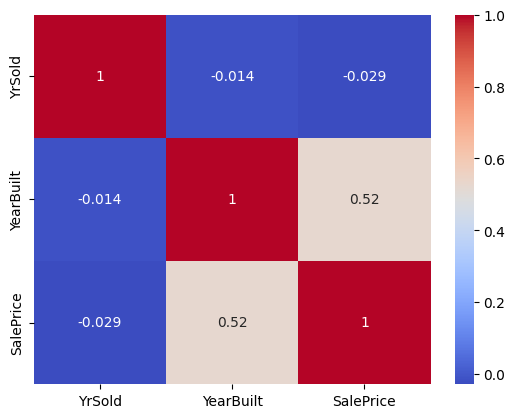

In [31]:
sns.heatmap(train_data[["YrSold", "YearBuilt", "SalePrice"]].corr(), annot = True, cmap = "coolwarm");

In [8]:
df_all = df_all.drop(columns = ["GarageCars", "1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd"])

In [9]:
X = df_all.iloc[:1460]
X_pred = df_all.iloc[1460:]
y = train_data["SalePrice"]

In [13]:
rf = RandomForestRegressor()
rf.fit(X, y)
feat_importances = pd.Series(rf.feature_importances_, index = rf.feature_names_in_).sort_values(ascending = True)
feat_importances[feat_importances < 0.001]

Street           0.000010
PoolQC           0.000014
Condition2       0.000024
MiscFeature      0.000043
MiscVal          0.000062
Heating          0.000067
GarageCond       0.000112
LowQualFinSF     0.000142
Electrical       0.000150
KitchenAbvGr     0.000209
3SsnPorch        0.000265
Fence            0.000323
PavedDrive       0.000323
BsmtCond         0.000329
GarageQual       0.000366
Foundation       0.000411
BldgType         0.000417
Alley            0.000420
BsmtFinType2     0.000430
ExterCond        0.000485
LandSlope        0.000493
RoofMatl         0.000508
Functional       0.000550
Condition1       0.000563
BsmtFinSF2       0.000613
HeatingQC        0.000697
BsmtHalfBath     0.000698
RoofStyle        0.000768
MSSubClass       0.000769
LotConfig        0.000780
EnclosedPorch    0.000910
HouseStyle       0.000957
HalfBath         0.000969
dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
def rmse(real, prediction):
    return np.sqrt(mean_squared_error(real, prediction))

In [53]:
rmse_scorer = make_scorer(rmse, greater_is_better = False)

In [42]:
gb_model = make_pipeline(RobustScaler(), GradientBoostingRegressor(learning_rate=0.05, min_samples_split=6, n_estimators=300))
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print(rmse(y_test, y_pred))
print(r2_score(y_test, y_pred))

23527.346048545016
0.8978152879673014


In [63]:
cross_val_score(GradientBoostingRegressor(learning_rate=0.05, min_samples_split=6, n_estimators=300), pd.DataFrame(RobustScaler().fit_transform(X), columns = X.columns), y, scoring = rmse_scorer).mean()

-27082.583326660544

In [52]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

y_pred2 = lgbm_model.predict(X_test)

print(rmse(y_test, y_pred2))
print(r2_score(y_test, y_pred2))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 67
[LightGBM] [Info] Start training from score 181806.240183
26709.89637595762
0.8683004014707568


In [61]:
cross_val_score(LGBMRegressor(), pd.DataFrame(RobustScaler().fit_transform(X), columns = X.columns), y, scoring = rmse_scorer).mean()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2900
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 68
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2917
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 69
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2916
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 69
[LightGBM] [Info] St

-29263.587144998757

In [57]:
estimator = LGBMRegressor()
params = {
    "boosting_type": ["gbdt", "dart", "rf"],
    "num_leaves": [8, 16, 31, 64],
    "max_depth": [3, 5, 10, 20, 30, -1],
    "learning_rate": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    "n_estimators": [50, 100, 200, 500, 1000],
}

random_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = params,
    scoring = rmse_scorer,
    n_iter = 50,
    cv = 5,
    n_jobs = -1
)

random_search.fit(X, y)

print("Best params: ", random_search.best_params_)
print("Best score: ", -random_search.best_score_)

e:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "e:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1398, in fit
    super().fit(
  File "e:\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "e:\anaconda3\Lib\site-packages\lightgbm\engine.py", line 297, in train
    booster = Booster(p

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3220
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 70
[LightGBM] [Info] Start training from score 180921.195890
Best params:  {'num_leaves': 16, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Best score:  27161.903195328494


In [65]:
train_data.dtypes[train_data.dtypes != "object"].index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [67]:
cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']
len(cols)

27

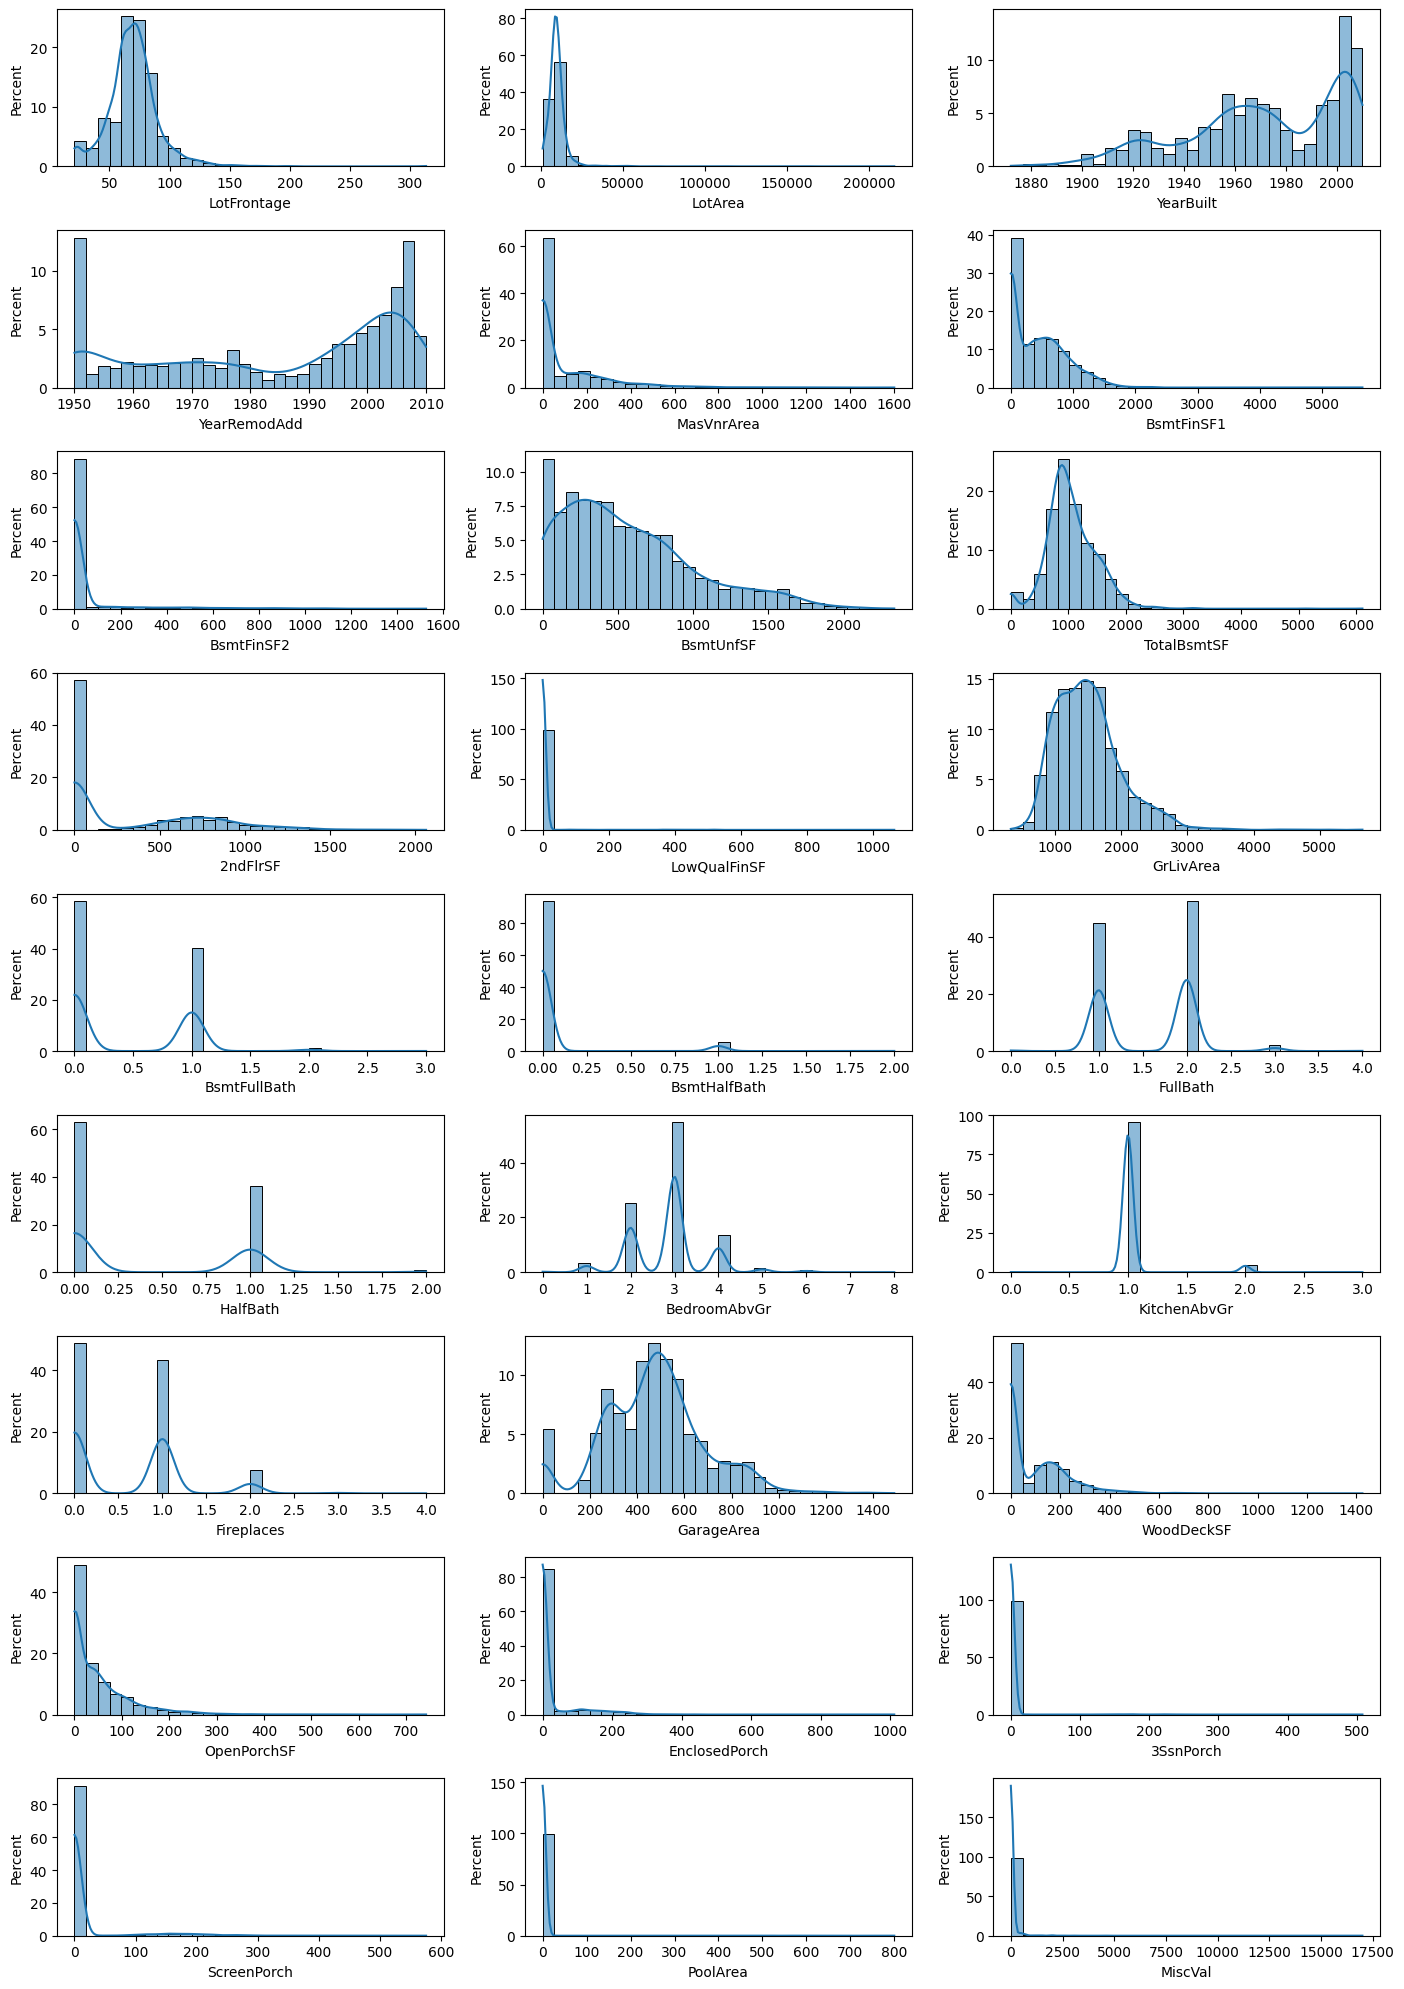

In [90]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (14, 20))
i = j = 0
for index, col in enumerate(cols):
    i = index // 3
    j = index % 3
    sns.histplot(df_all[col], bins = 30, stat = "percent", fill = True, kde = True, ax = ax[i, j])
fig.tight_layout()
plt.show()

In [81]:
pd.Series(skew(X), index = X.columns).abs().sort_values(ascending = False).head(75)

MiscVal         24.451640
PoolQC          17.778162
Street          15.502821
PoolArea        14.813135
Condition2      13.158307
                  ...    
YrSold           0.096170
Foundation       0.091124
Neighborhood     0.042078
FullBath         0.036524
BsmtFinType1     0.012166
Length: 74, dtype: float64

In [89]:
X["KitchenAbvGr"].value_counts(normalize = True)

KitchenAbvGr
1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: proportion, dtype: float64

In [93]:
model = make_pipeline(RobustScaler(), GradientBoostingRegressor(learning_rate=0.05, min_samples_split=6, n_estimators=300))

model.fit(X_train.drop(columns = ["3SsnPorch", "PoolArea", "MiscVal"]), y_train)

y_pred_xd = model.predict(X_test.drop(columns = ["3SsnPorch", "PoolArea", "MiscVal"]))

print(rmse(y_test, y_pred_xd))
print(r2_score(y_test, y_pred_xd))

23537.029185471045
0.8977311584463742
